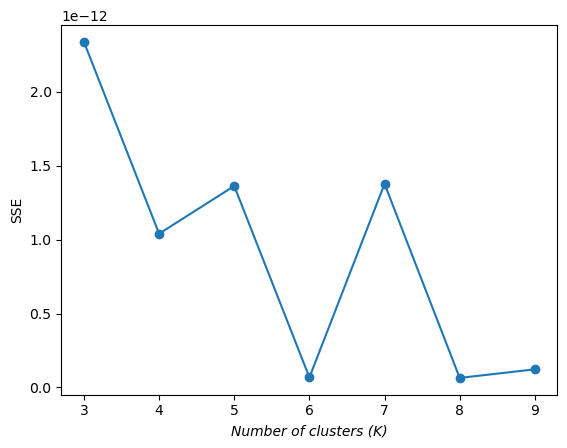

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carga las imágenes segmentadas con diferentes valores de k

image_k3 = cv2.imread('segmented_K-means_k=3.tif', cv2.IMREAD_GRAYSCALE)
image_k4 = cv2.imread('segmented_K-means_k=4.tif', cv2.IMREAD_GRAYSCALE)
image_k5 = cv2.imread('segmented_K-means_k=5.tif', cv2.IMREAD_GRAYSCALE)
image_k6 = cv2.imread('segmented_K-means_k=6.tif', cv2.IMREAD_GRAYSCALE)
image_k7 = cv2.imread('segmented_K-means_k=7.tif', cv2.IMREAD_GRAYSCALE)
image_k8 = cv2.imread('segmented_K-means_k=8.tif', cv2.IMREAD_GRAYSCALE)
image_k9 = cv2.imread('segmented_K-means_k=9.tif', cv2.IMREAD_GRAYSCALE)

# Verifica que las imágenes se hayan cargado correctamente
if any(img is None for img in [image_k3, image_k4, image_k5, image_k6, image_k7, image_k8, image_k9]):
    print("Error al cargar una o más imágenes segmentadas.")
    exit()

# Lista de imágenes segmentadas
segmented_images = [image_k3, image_k4, image_k5, image_k6, image_k7, image_k8, image_k9]

# Lista de valores de k correspondientes a cada imagen segmentada
k_values = [3, 4, 5, 6, 7, 8, 9]

# Método del codo
sse_values = []
for image in segmented_images:
    flattened_image = image.flatten().reshape(-1, 1)
    sse_values.append(KMeans(n_clusters=len(np.unique(image)), n_init='auto').fit(flattened_image).inertia_)

# Graficar SSE vs k
plt.plot(k_values, sse_values, marker='o')
plt.xlabel("Number of clusters (K)", style="italic")
plt.ylabel('SSE')
plt.show()
